In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-zs-LIAF)

We'll measure the error at the time $t=1$.

In [2]:
du_dt(u, t) = u
û = exp
a, b = 0.0, 1.0;
n = [5, 10, 20, 40, 60]
err = []
t, u = [], []
for n in n
    h = (b - a) / n
    t = [a + i * h for i in 0:n]
    u = [1; û(h); zeros(n - 1)]
    f_val = [du_dt(u[1], t[1]); zeros(n)]
    for i in 2:n
        f_val[i] = du_dt(u[i], t[i])
        u[i+1] = -4 * u[i] + 5 * u[i-1] + h * (4 * f_val[i] + 2 * f_val[i-1])
    end
    push!(err, abs(û(b) - u[end]))
end
@pt :header=["n", "h", "error"] [n (b - a) ./ n err]

n,h,error
5,0.2,0.0160452
10,0.1,2.84548
20,0.05,1.6225e6
40,0.025,9.3442e18
60,0.0166667,1.74013e32


The error starts out promisingly, but things explode from there. A graph of the last numerical attempt yields a clue.

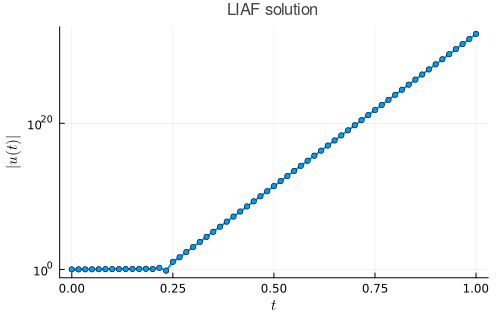

In [3]:
using Plots
plot(t, abs.(u);
    m=3,  label="",
    xlabel=L"t",  yaxis=(:log10, L"|u(t)|"), 
    title="LIAF solution")

It's clear that the solution is growing exponentially in time.